In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('govidfront.jpeg',0)

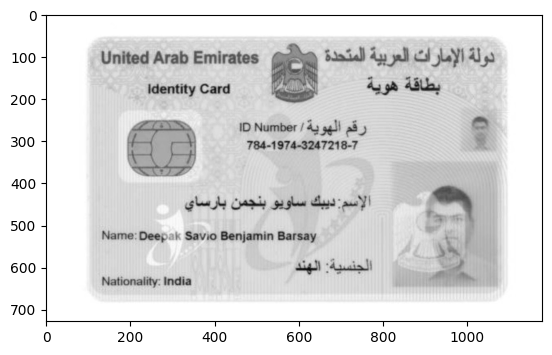

In [3]:
plt.imshow(img,cmap='gray')

# Resize

In [4]:
img.shape

(728, 1179)

In [5]:
img_resize = cv2.resize(img,None,fx=2,fy=2, interpolation = cv2.INTER_CUBIC)

In [6]:
img_resize.shape

(1456, 2358)

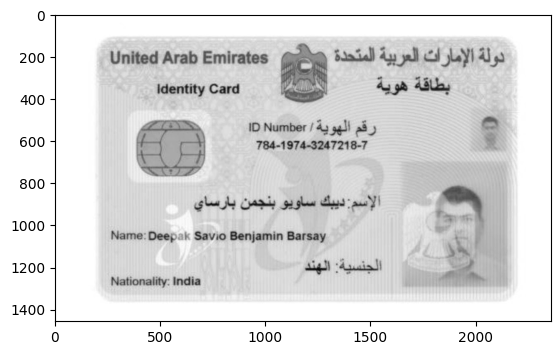

In [7]:
plt.imshow(img_resize,cmap='gray')

# Adaptive thresholding

In [8]:
img_athresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

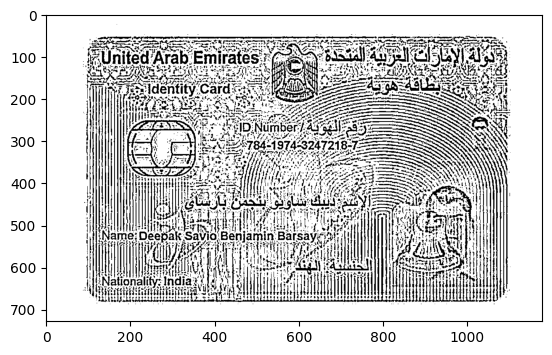

In [9]:
plt.imshow(img_athresh,cmap = 'gray')

# Denoising

In [10]:
img_denoise = cv2.fastNlMeansDenoising(img,None,30,7,21)

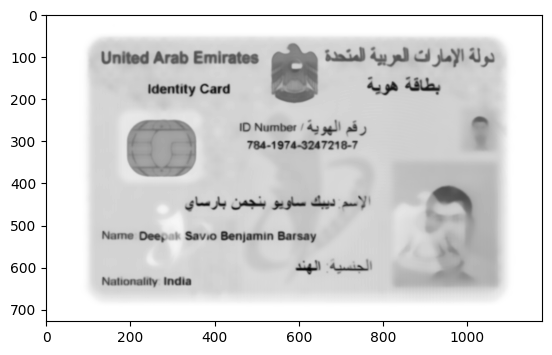

In [11]:
plt.imshow(img_denoise, cmap = 'gray')

In [12]:
import pytesseract
text = pytesseract.image_to_string(img_athresh)
print(text)

me: Deepak




# Contrast Enhancement

In [13]:
img_cont = cv2.equalizeHist(img)

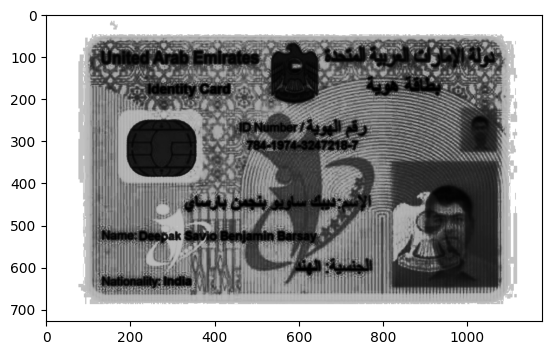

In [14]:
plt.imshow(img_cont,cmap = 'gray')

# Morphological Operations

In [15]:
kernel = np.ones((3,3), np.uint8)
img_morpho = cv2.morphologyEx(img_athresh,cv2.MORPH_CLOSE,kernel)

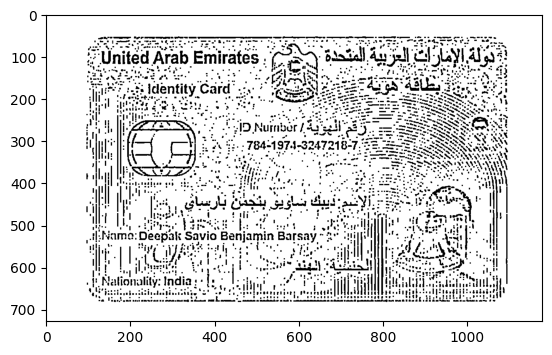

In [16]:
plt.imshow(img_morpho,cmap = 'gray')

In [17]:
text = pytesseract.image_to_string(img_athresh)
print(text)

me: Deepak




In [18]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img_front = cv2.filter2D(img, -1, kernel)

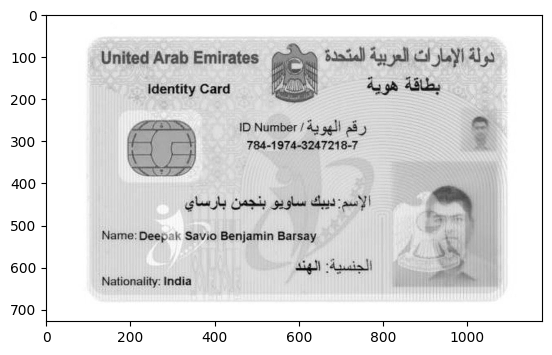

In [19]:
plt.imshow(img_front,cmap = 'gray')

# OCR

In [20]:
import cv2
import numpy as np


In [21]:
img = cv2.imread('govidfront.jpeg',0)


In [22]:
img_resized = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)


In [23]:
img_denoised = cv2.fastNlMeansDenoising(img_resized, None, 30, 7, 21)


In [24]:
img_threshold = cv2.adaptiveThreshold(img_denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)


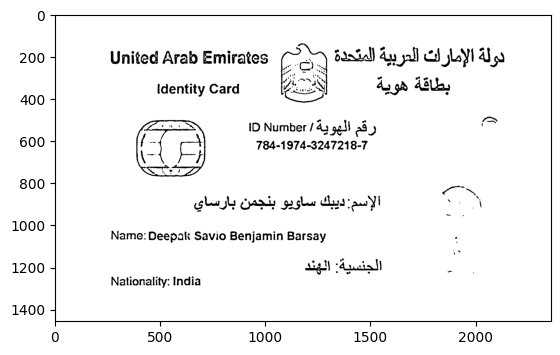

In [25]:
kernel = np.ones((3, 3), np.uint8)
img_morph = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_morph,cmap = 'gray')

In [26]:
#custom_config = r'--oem 3 --psm 6'
text_front = pytesseract.image_to_string(img_morph)

In [27]:
print(text_front)

United Arab Emirates baatall Ay yall CA LY! 4d 99

Identity Card CON dy ge 48Us,
ID Number / 43 g¢li 23) co
784-1974-3247218-7
ey,
e aN,
glass Gar go shu dhs: awl yO

Name: Deepak Savio Benjamin Barsay

Nationality: India



In [28]:
lines = text_front.splitlines()

In [29]:
ID_NUMBER =''
NAME = ''
NATIONALITY = ''


In [30]:
for line in lines:
    if 'ID Number' in line:
        id_index_line = lines.index(line)
        ID_NUMBER = lines[id_index_line + 1].strip()
    if 'Name' in line:
        NAME = line.split('Name')[1].strip(':')
    if 'Nationality' in line:
        NATIONALITY = line.split('Nationality')[1].strip(':')

In [31]:
print('Id_number:',ID_NUMBER)
print('Name:',NAME)
print('NAtionality:',NATIONALITY)

Id_number: 784-1974-3247218-7
Name:  Deepak Savio Benjamin Barsay
NAtionality:  India


# Back

In [32]:
img_back = cv2.imread('govidback.jpeg',0)


In [33]:
img_resized = cv2.resize(img_back, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)


In [34]:
img_denoised = cv2.fastNlMeansDenoising(img_resized, None, 30, 7, 21)


In [35]:
img_threshold = cv2.adaptiveThreshold(img_denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)


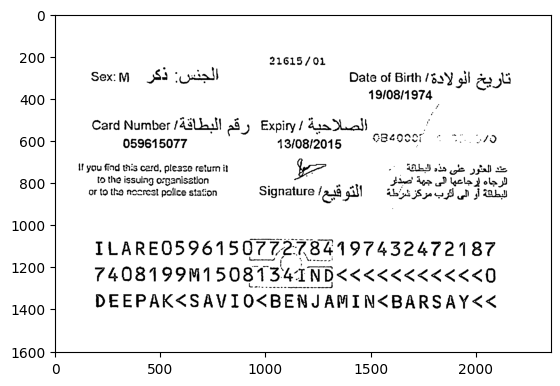

In [36]:
kernel = np.ones((3, 3), np.uint8)
img_morph = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_morph,cmap = 'gray')

In [37]:
text_back = pytesseract.image_to_string(img_morph)
print(text_back)

. 21615/01
Sex:M 83 ‘Gta Date of Birth /5a gil ay 0
19/08/1974
Card Number /43Uail! 8) Expiry / 4oa.Luall ae
059615077 13/08/2015 Vee88eE 70

if you find this card, please return it
to the issuing organisation

or to the nocrest pollee station Signature / F il

Fant ga LD Gels J ole)
tit Spe A ol J bs

ILAREO596150772784197432472187
7408199M1508134IND<<<<<<<<<<<g
DEEPAK<SAVIO<BENJAMIN<BARSAY<<



In [38]:
import re

#sex_match = re.search(r'Sex\s*([M|F])', text_back)
sex_match = re.search(r'Sex\s*[:/]\s*([MF])', text_back)
dob_match = re.search(r'(\d{2}/\d{2}/\d{4})', text_back)
card_number_match = re.search(r'(\d{9})', text_back)
expiry_match = re.search(r'(\d{2}/\d{2}/\d{4})\s*$', text_back, re.MULTILINE)

sex = sex_match.group(1) if sex_match else None
dob = dob_match.group(1) if dob_match else None
card_number = card_number_match.group(1) if card_number_match else None
expiry = expiry_match.group(1) if expiry_match else None

if dob == expiry:
    # Search again specifically after the 'Card Number' keyword in case it's wrongly captured
    expiry_search = re.search(r'(\d{2}/\d{2}/\d{4})', text_back.split('Expiry')[-1], re.DOTALL)
    if expiry_search:
        expiry = expiry_search.group(1)



In [39]:
print('Id_number:',ID_NUMBER)
print('Name:',NAME)
print('NAtionality:',NATIONALITY)
print('Sex:', sex)
print('DOB:', dob)
print('Card Number:', card_number)
print('Expiry:', expiry)

Id_number: 784-1974-3247218-7
Name:  Deepak Savio Benjamin Barsay
NAtionality:  India
Sex: M
DOB: 19/08/1974
Card Number: 059615077
Expiry: 13/08/2015
